In [1]:
########################################################
# Sites:
# 1 = Sandnes
# 2 = Iffiartafik
# 3 = Qoornoq
# 4 = Ersaa
# 5 = Kangeq
# 6 = all
# 7 = all_separate
#
# Types:
# Natural = 1
# Cultural = 2
# both = 3
#
# Variables:
# 1 = soil water content
# 2 = pH
# 3 = Roots < 1mm (dry)
# 4 = Roots > 1mm (dry)
# 5 = Horse tail (dry)
# 6 = Soil weight
# 7 = Remaining soil after sifting
# 8 = waste by sifting
# 20 = Total biomass
# 21 = NDVI handheld
# 22 = LAI

# plot modes:
# 1 = all plots

# 2 = pool natural/cultural plots together and plot mean
# 2.1 = add std as error plot
# 2.2 = add std as shaded area

# 3 = Scatter plot

# 4 = Scatter plot mean
# 4.1 = add std error bar on y-axis
# 4.2 = add std error bar on x-axis
# 4.3 = add std error bar on both axes

#########################################################

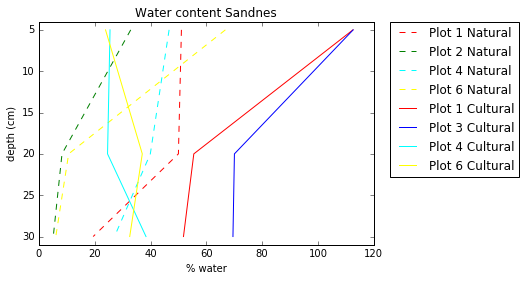

In [11]:
from plotfunctions import *
%matplotlib inline

inFile = '/Users/rasmus/Desktop/Lab_sheet_v9.19.xlsx'
sites = 1
types = 3
variable_1 = 1
variable_2 = 1
plotmode = 1
reg = True

################
if sites == 7:
    for num in range(1,7):
        plot(inFile, num, types, variable_1, variable_2, plotmode, reg)
else:
    plot(inFile, sites, types, variable_1, variable_2, plotmode, reg)

In [4]:
a = [1]
if a:
    print 'hey'

hey
